In [1]:
import pandas as pd

In [2]:
bp=pd.read_csv(r"F:\carreer\Patient_with_abnormal_bloodpressure.csv") # loading the data

In [3]:
bp.head() # takign the overview of the data

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


# Data Cleaning

In [98]:
bp.shape # to know the record and column

(2000, 14)

In [4]:
bp.isnull().sum() # check nulls

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

In [5]:
bp.Pregnancy.value_counts()

0.0    243
1.0    199
Name: Pregnancy, dtype: int64

In [6]:
bp.alcohol_consumption_per_day.describe()

count    1758.000000
mean      251.008532
std       143.651884
min         0.000000
25%       126.250000
50%       250.000000
75%       377.750000
max       499.000000
Name: alcohol_consumption_per_day, dtype: float64

In [7]:
bp.Genetic_Pedigree_Coefficient.fillna(bp.Genetic_Pedigree_Coefficient.median(),inplace=True) 

In [8]:
bp.alcohol_consumption_per_day.fillna(bp.alcohol_consumption_per_day.median(),inplace=True)

In [9]:
bp.Pregnancy.fillna(0.0,inplace=True)

In [10]:
bp.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [11]:
bp=bp.drop(["Patient_Number"], axis=1) #droppig unnecesary colums


# Data Sampling

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
bp_train ,bp_test= train_test_split(bp, test_size=.2)

In [14]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      2000 non-null   float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    2000 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

In [15]:
bp_train_x =bp_train.iloc[:, 1:]
bp_train_y =bp_train.iloc[:,0]

bp_test_x =bp_test.iloc[:, 1:]
bp_test_y =bp_test.iloc[:,0]

In [16]:
bp_test_x

,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
1047,13.29,0.97,47,20,0,0.0,1,22227,47071,186.0,1,1,0
1864,15.96,0.32,33,47,0,0.0,1,47445,12160,445.0,1,1,1
1846,11.93,0.98,75,25,1,0.0,0,25549,14561,485.0,3,1,1
338,15.36,0.34,38,19,1,0.0,0,37260,9789,192.0,1,0,1
124,11.11,0.18,71,18,1,0.0,0,8334,26146,134.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
860,9.70,0.00,65,37,0,0.0,1,32373,18114,356.0,3,1,1
1102,11.33,0.62,29,21,1,1.0,1,14017,37515,345.0,1,0,0
172,11.50,0.34,58,39,1,0.0,0,16680,21321,101.0,3,1,0
1928,13.71,0.08,41,36,0,0.0,0,33365,13896,128.0,2,1,1


In [17]:
bp_test_y

1047    1
1864    1
1846    1
338     1
124     0
       ..
860     1
1102    0
172     1
1928    1
1353    1
Name: Blood_Pressure_Abnormality, Length: 400, dtype: int64

# Building a model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_cr=LogisticRegression()

In [20]:
log_cr.fit(bp_train_x,bp_train_y)

LogisticRegression()

In [21]:
pred=log_cr.predict(bp_test_x)

In [22]:
len(pred)

400

# Confusion matrix

In [23]:
from sklearn.metrics import confusion_matrix # Method 2

In [24]:
tab_ch=confusion_matrix(bp_test_y,pred)
tab_ch # form top it is prdicted sir has teach

array([[118,  86],
       [109,  87]], dtype=int64)

# Accuracy 

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
accuracy_score(bp_test_y,pred)*100

51.24999999999999

# Precision

In [27]:
from sklearn.metrics import precision_score

In [28]:
precision_score(bp_test_y,pred)

0.5028901734104047

# Recall

In [29]:
from sklearn.metrics import recall_score

In [30]:
recall_score(bp_test_y,pred)

0.44387755102040816

# F1 score

In [31]:
from sklearn.metrics import f1_score

In [32]:
f1_score(bp_test_y,pred)

0.4715447154471545

# ROC Curve

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [34]:
pred=log_cr.predict(bp_test_x)
pred

array([1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,

In [35]:
len(pred)

400

In [36]:
pred_prob=log_cr.predict_proba(bp_test_x)

In [37]:
roc_auc_score(bp_test_y,pred)

0.5111544617847138

In [38]:
fpr,tpr,Thersholud=roc_curve(bp_test_y,pred_prob[:,1])

# Data Visualization

In [39]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'Auroc is 0.51115 ')

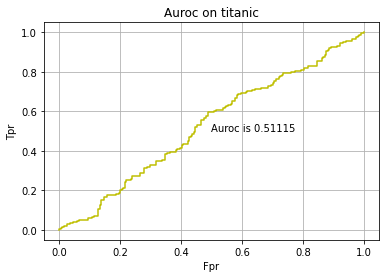

In [42]:
plt.plot(fpr,tpr,color='y')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("Auroc on titanic")
plt.grid()
plt.text(x=.5, y=.5, s= "Auroc is 0.51115 ")

In [43]:
# This model is giving us the low accuracy so we will have to use another algorithm 
# Decision tree

# Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
dt = DecisionTreeClassifier()

In [46]:
dt.fit(bp_train_x,bp_train_y)

DecisionTreeClassifier()

In [47]:
pred = dt.predict(bp_test_x)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(bp_test_y, pred)

array([[182,  22],
       [ 30, 166]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(bp_test_y, pred)

0.87

In [52]:
from sklearn.metrics import precision_score

In [53]:
precision_score(bp_test_y, pred)

0.8829787234042553

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(bp_test_y, pred)

0.8645833333333334

In [56]:
from sklearn.metrics import recall_score

In [57]:
recall_score(bp_test_y, pred)

0.8469387755102041

In [58]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [59]:
roc_auc_score(bp_test_y, pred)

0.8695478191276511

In [60]:
pred_prob = dt.predict_proba(bp_test_x)
pred_prob

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [61]:
fpr,tpr,Thersholud=roc_curve(bp_test_y,pred_prob[:,1])

In [62]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'Auroc is 0.869 ')

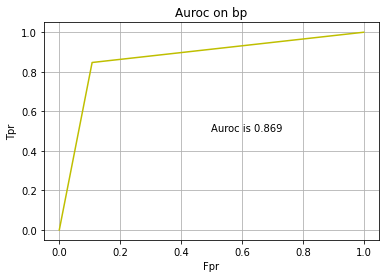

In [64]:
plt.plot(fpr,tpr,color='y')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("Auroc on bp")
plt.grid()
plt.text(x=.5, y=.5, s= "Auroc is 0.869 ")

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dt = DecisionTreeClassifier(criterion='entropy')

In [105]:
dt.fit(bp_train_x,bp_train_y)

DecisionTreeClassifier(criterion='entropy')

In [106]:
pred = dt.predict(bp_test_x)
pred

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,

In [107]:
tab_bp = confusion_matrix(bp_test_y, pred)
tab_bp

array([[184,  20],
       [ 28, 168]], dtype=int64)

In [108]:
dt.feature_importances_ # this is the feature importance

array([0.29728344, 0.26685925, 0.04894925, 0.04279668, 0.00820389,
       0.00243781, 0.00398295, 0.03861242, 0.04430693, 0.0516912 ,
       0.0147956 , 0.13800757, 0.04207302])

In [109]:
bp_train_x.columns

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age', 'BMI',
       'Sex', 'Pregnancy', 'Smoking', 'Physical_activity',
       'salt_content_in_the_diet', 'alcohol_consumption_per_day',
       'Level_of_Stress', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [110]:
# creating dataframe # 3 rows

feature_imp= pd.DataFrame({'feature': bp_train_x.columns,'Importance':dt.feature_importances_})
feature_imp

,feature,Importance
0,Level_of_Hemoglobin,0.297283
1,Genetic_Pedigree_Coefficient,0.266859
2,Age,0.048949
3,BMI,0.042797
4,Sex,0.008204
5,Pregnancy,0.002438
6,Smoking,0.003983
7,Physical_activity,0.038612
8,salt_content_in_the_diet,0.044307
9,alcohol_consumption_per_day,0.051691


In [111]:
# so if you have 20 rows then what will do to find which is the hightest value ???

feature_imp.sort_values('Importance',ascending = False)

# higher the value more importance / siginficance is the feature impo

,feature,Importance
0,Level_of_Hemoglobin,0.297283
1,Genetic_Pedigree_Coefficient,0.266859
11,Chronic_kidney_disease,0.138008
9,alcohol_consumption_per_day,0.051691
2,Age,0.048949
8,salt_content_in_the_diet,0.044307
3,BMI,0.042797
12,Adrenal_and_thyroid_disorders,0.042073
7,Physical_activity,0.038612
10,Level_of_Stress,0.014796


In [112]:
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot
# library to get tree in image

In [113]:
dot_data = StringIO()


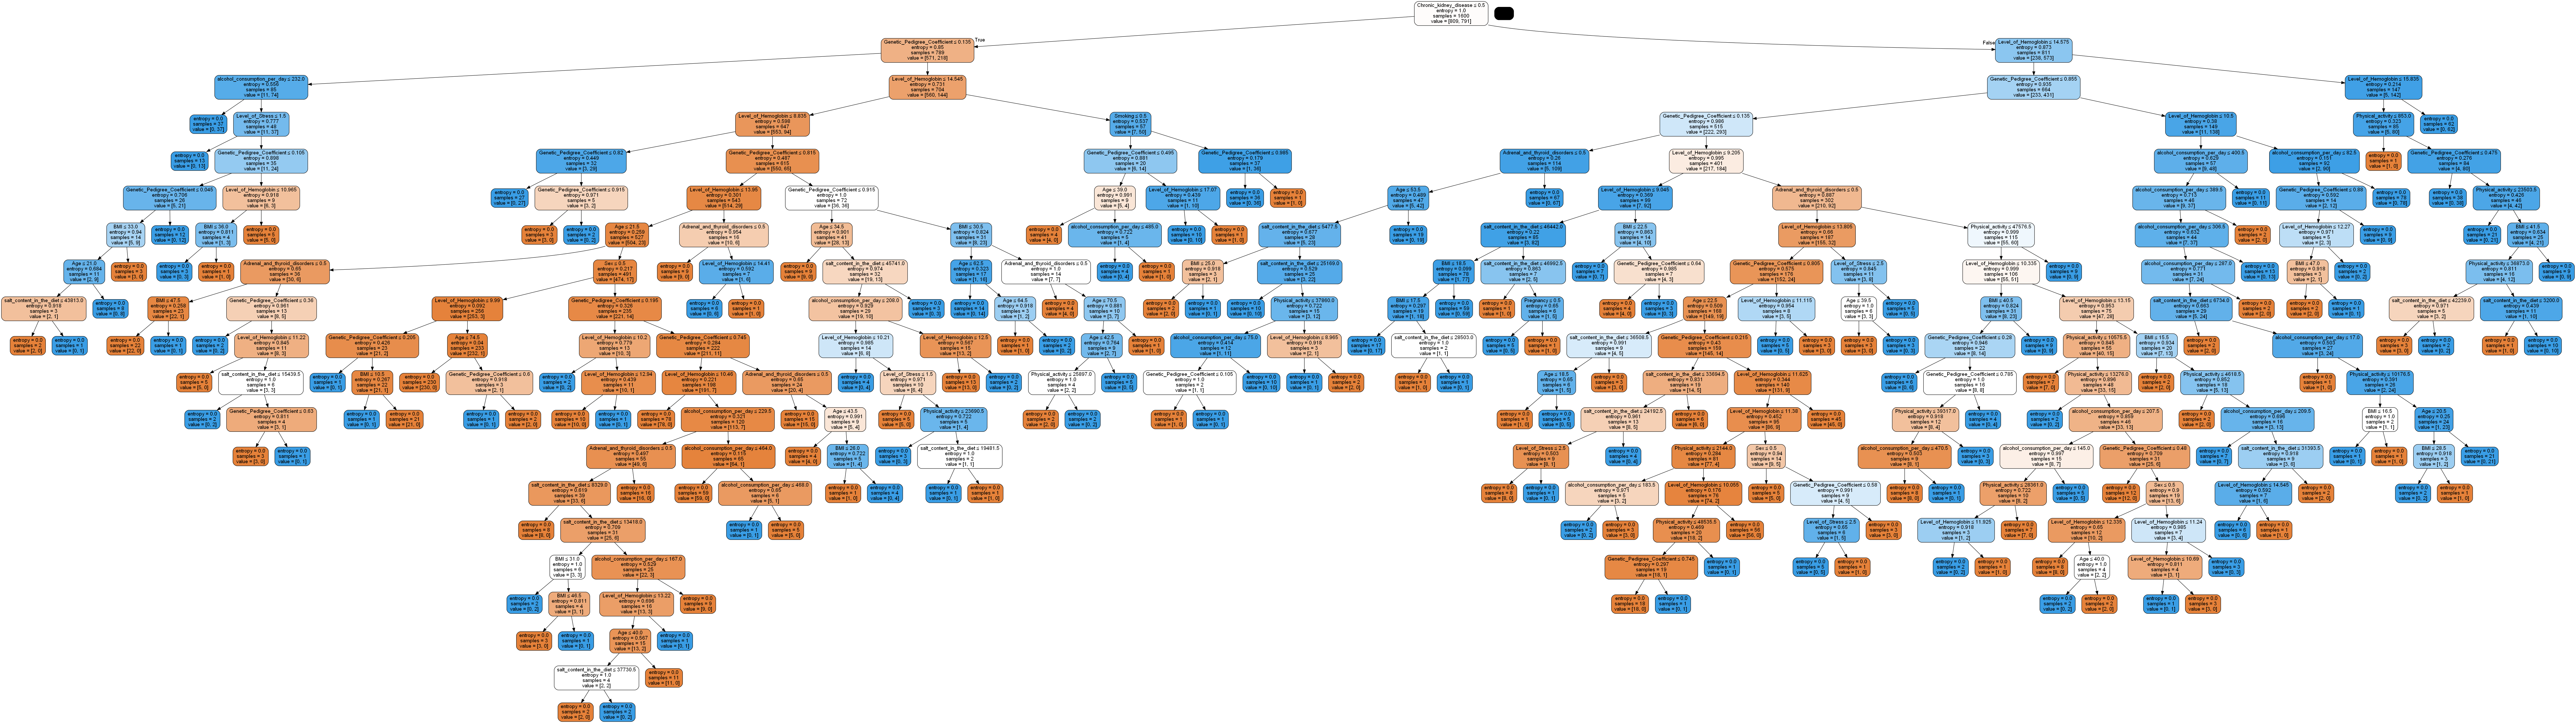

In [114]:
# code required to build the decision tree
export_graphviz(dt, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True , feature_names=bp_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [115]:
dt = DecisionTreeClassifier(max_depth=4 , class_weight="balanced") 
            # this will balance the class automatically
            # so you can say class weight equal to balance or not balance can also be the part of the hyperparameter
            # because this is also not part of the data and user can control it.

dt.fit(bp_train_x,bp_train_y) # decision tree(model) has been build

pred_bp = dt.predict(bp_test_x)

from sklearn.metrics import confusion_matrix

tab_bp = confusion_matrix(bp_test_y , pred_bp)
tab_bp

array([[178,  26],
       [ 50, 146]], dtype=int64)

In [116]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import pydot
# library to get tree in image

In [117]:
dot_data = StringIO()


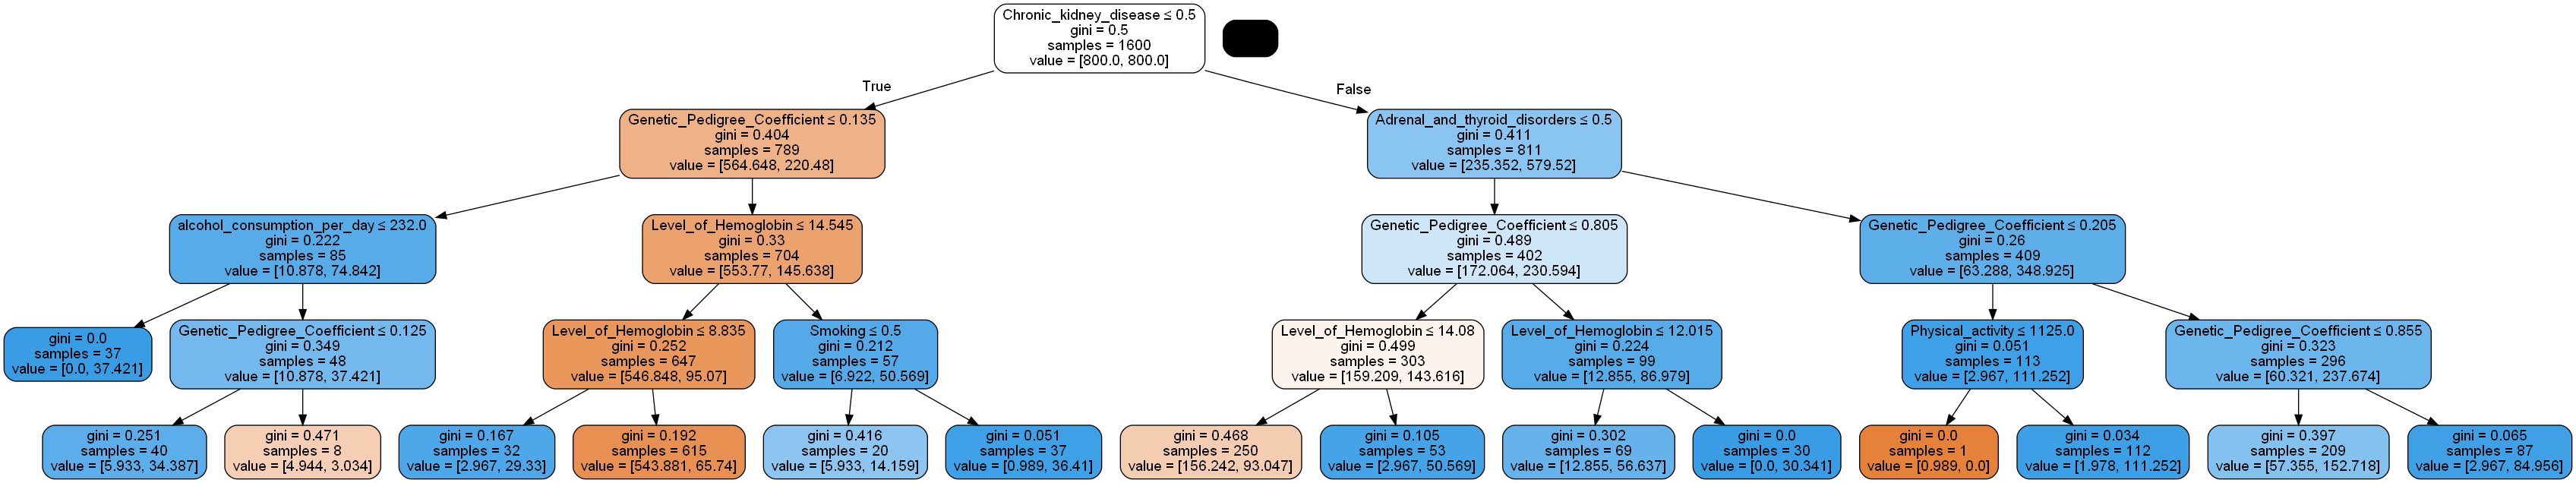

In [118]:
# code required to build the decision tree
export_graphviz(dt, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True , feature_names=bp_train_x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
confusion_matrix(bp_test_y, pred)

array([[194,  10],
       [ 47, 149]], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score

In [71]:
accuracy_score(bp_test_y, pred)

0.8575

In [72]:
from sklearn.metrics import precision_score

In [73]:
precision_score(bp_test_y, pred)

0.9371069182389937

In [74]:
from sklearn.metrics import f1_score

In [75]:
f1_score(bp_test_y, pred)

0.83943661971831

In [76]:
from sklearn.metrics import recall_score

In [77]:
recall_score(bp_test_y, pred)

0.7602040816326531

In [78]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [79]:
roc_auc_score(bp_test_y, pred)

0.8555922368947577

In [80]:
pred_prob = dt.predict_proba(bp_test_x)
pred_prob

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09090909, 0.90909091],
       [0.946593  , 0.053407  ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.19230769, 0.80769231],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.        , 1.        ],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.        , 1.        ],
       [0.69536424, 0.30463576],
       [0.69536424, 0.30463576],
       [0.        , 1.        ],
       [0.10638298, 0.89361702],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.5       , 0.5       ],
       [0.946593  , 0.053407  ],
       [0.        , 1.        ],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.946593  , 0.053407  ],
       [0.        , 1.        ],
       [0.

In [81]:
fpr,tpr,Thersholud=roc_curve(bp_test_y,pred_prob[:,1])

In [82]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'Auroc is 0.8555 ')

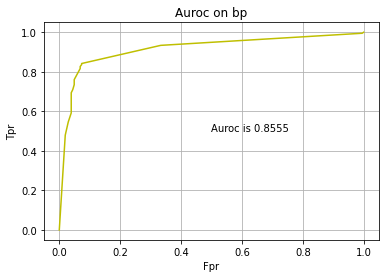

In [83]:
plt.plot(fpr,tpr,color='y')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("Auroc on bp")
plt.grid()
plt.text(x=.5, y=.5, s= "Auroc is 0.8555 ")

# trying it on the random forest too

In [119]:
from sklearn.ensemble import RandomForestClassifier
rfc_bp = RandomForestClassifier()

In [120]:
rfc_bp.fit(bp_train_x, bp_train_y)

RandomForestClassifier()

In [121]:
pred_rfc = rfc_bp.predict(bp_test_x)

In [122]:
from sklearn.metrics import confusion_matrix

In [123]:
tab_rfc = confusion_matrix(bp_test_y , pred_rfc)

In [124]:
tab_rfc

array([[184,  20],
       [ 24, 172]], dtype=int64)

In [125]:
tab_rfc.diagonal().sum()/ tab_rfc.sum()

0.89

In [126]:
feature_importance_df = pd.DataFrame({'Featured' :bp_train_x.columns , "Importance" : rfc_bp.feature_importances_})

In [127]:
feature_importance_df.sort_values("Importance" , ascending = False)

,Featured,Importance
1,Genetic_Pedigree_Coefficient,0.241593
0,Level_of_Hemoglobin,0.235597
11,Chronic_kidney_disease,0.131166
12,Adrenal_and_thyroid_disorders,0.063595
8,salt_content_in_the_diet,0.063346
7,Physical_activity,0.059584
2,Age,0.057702
9,alcohol_consumption_per_day,0.050715
3,BMI,0.048243
10,Level_of_Stress,0.015979


In [128]:
from sklearn.ensemble import RandomForestClassifier
rfc_bp = RandomForestClassifier( criterion= 'entropy' , max_depth= 10)
        # here default no of tree is 100 i.e n_estimator --->but use it wisely 
        # though we increase no of trees at beyond a point but it will not affect on model the model preformace will be same
        # but as u increase tree time taken will increase
        # as like decicision treee we can change the criterion 
        # as it is also consist of no of decision tree so gini and entropy hyperparameter are same here

In [129]:
rfc_bp.fit(bp_train_x, bp_train_y)

RandomForestClassifier(criterion='entropy', max_depth=10)

In [130]:
pred_rfc = rfc_bp.predict(bp_test_x)

In [131]:
from sklearn.metrics import confusion_matrix

In [133]:
tab_rfc = confusion_matrix(bp_test_y , pred_rfc)

In [134]:
tab_rfc

array([[186,  18],
       [ 25, 171]], dtype=int64)

In [135]:
tab_rfc.diagonal().sum()/ tab_rfc.sum()

0.8925

In [136]:
feature_importance_df = pd.DataFrame({'Featured' :bp_train_x.columns , "Importance" : rfc_bp.feature_importances_})

In [137]:
feature_importance_df.sort_values("Importance" , ascending = False)

,Featured,Importance
1,Genetic_Pedigree_Coefficient,0.258699
0,Level_of_Hemoglobin,0.235599
11,Chronic_kidney_disease,0.140377
12,Adrenal_and_thyroid_disorders,0.068083
7,Physical_activity,0.054577
8,salt_content_in_the_diet,0.054044
2,Age,0.051094
9,alcohol_consumption_per_day,0.049034
3,BMI,0.045226
4,Sex,0.015505


In [138]:
from sklearn.metrics import precision_score

In [139]:
precision_score(bp_test_y, pred)

0.8936170212765957

In [140]:
from sklearn.metrics import f1_score

In [141]:
f1_score(bp_test_y, pred)

0.875

In [142]:
from sklearn.metrics import recall_score

In [143]:
recall_score(bp_test_y, pred)

0.8571428571428571

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [145]:
roc_auc_score(bp_test_y, pred)

0.8795518207282913

In [146]:
pred_prob = dt.predict_proba(bp_test_x)
pred_prob

array([[0.        , 1.        ],
       [0.2730232 , 0.7269768 ],
       [0.03374142, 0.96625858],
       [0.29529617, 0.70470383],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.14715366, 0.85284634],
       [0.14715366, 0.85284634],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.01746677, 0.98253323],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.2730232 , 0.7269768 ],
       [0.62675145, 0.37324855],
       [0.2730232 , 0.7269768 ],
       [0.01746677, 0.98253323],
       [0.62675145, 0.37324855],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.01746677, 0.98253323],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.8921632 , 0.1078368 ],
       [0.01746677, 0.98253323],
       [0.

In [147]:
fpr,tpr,Thersholud=roc_curve(bp_test_y,pred_prob[:,1])

In [148]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'Auroc is 0.8795 ')

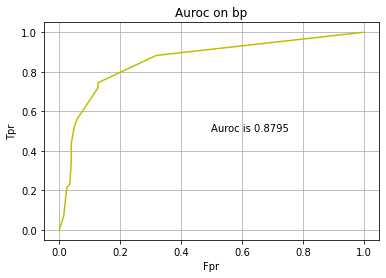

In [150]:
plt.plot(fpr,tpr,color='y')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title("Auroc on bp")
plt.grid()
plt.text(x=.5, y=.5, s= "Auroc is 0.8795 ")